10. This question should be answered using the Carseats data set.

In [2]:
import sklearn
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv', index_col=0)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [190]:
df['US'] = (df['US']=='Yes').astype('int')

In [191]:
df['Urban'] = (df['Urban']=='Yes').astype('int')

In [192]:
shelveloc_cat = pd.get_dummies(df['ShelveLoc'], prefix='ShelveLoc').iloc[:,1:]
df = df.drop('ShelveLoc', axis=1)

In [193]:
df = df.join(shelveloc_cat)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,1,1,0,1
398,5.94,100,79,7,284,95,50,12,1,1,0,0


In [194]:
abbreviated_X = df[['Price', 'Urban', 'US']]
X = df.drop('Sales',axis=1)
y = df['Sales']

In [195]:
abbreviated_X

,Price,Urban,US
0,120,1,1
1,83,1,1
2,80,1,1
3,97,1,1
4,128,1,0
...,...,...,...
395,128,1,1
396,120,0,1
397,159,1,1
398,95,1,1


In [196]:
reg = linear_model.LinearRegression()
reg.fit(abbreviated_X,y)
reg.coef_

array([-0.05445885, -0.02191615,  1.2005727 ])

In [197]:
?sm.OLS

In [198]:
abbreviated_X = sm.add_constant(abbreviated_X)

In [199]:
#apparently - if you want p-value etc - SciKit Learn doesn't have it, so need to use statsmodels
reg_sm = sm.OLS(y,abbreviated_X)

In [200]:
fii = reg_sm.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [201]:
fii.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.234    
Dependent Variable: Sales            AIC:                1863.3121
Date:               2022-01-23 13:58 BIC:                1879.2779
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           3                F-statistic:        41.52    
Df Residuals:       396              Prob (F-statistic): 2.39e-23 
R-squared:          0.239            Scale:              6.1132   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     13.0435     0.6510    20.0357   0.0000   11.7636   14.3233
Price     -0.0545     0.0052   -10.3892   0.0000   -0.0648   -0.0442
Urban     -0.0219     0.2717    -0.0807   0.9357   -0.5560    0.5121
US         1.2006     0.2590     4.6347   0.0000    0.6913    1.7098
------------------------------------------------------------------
Omnibus:               0.676        Durbin-Watson:           1.912
Prob(Omnibus):         0.713        Jarque-Bera (JB):        0.758
Skew:                  0.093        Prob(JB):                0.684
Kurtosis:              2.897        Condition No.:           628  
==================================================================

"""

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

In [202]:
# Price really matters for every increase in price of 0.0545 there's a dollar decrease in sales

#Urban  does not meet the null hypothesis

#US also matter ($1.20 added when in US); they'll add except for Urban quite a bit to the sales P values are very low
#indicating that the null hypothesis (beta=0) is not likely the case.

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.

In [203]:
#Sales = 13.0435 + -0.0545 * Price + -0.0219 * Urban + 1.2006 * US

(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

In [204]:
p_values
#price and US are big ones, urban should be thrown out

const    3.626602e-62
Price    1.609917e-22
Urban    9.357389e-01
US       4.860245e-06
Name: P>|t|, dtype: float64

(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [205]:
abbreviated_X2 = df[['Price', 'US']].copy()
abbreviated_X2 = sm.add_constant(abbreviated_X2)
reg_sm2 = sm.OLS(y, abbreviated_X2)
fii2 = reg_sm2.fit()
p_values2 = fii2.summary2().tables[1]['P>|t|']

In [206]:
p_values2
fii2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.235    
Dependent Variable: Sales            AIC:                1861.3186
Date:               2022-01-23 13:58 BIC:                1873.2930
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           2                F-statistic:        62.43    
Df Residuals:       397              Prob (F-statistic): 2.66e-24 
R-squared:          0.239            Scale:              6.0979   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     13.0308     0.6310    20.6518   0.0000   11.7903   14.2713
Price     -0.0545     0.0052   -10.4161   0.0000   -0.0648   -0.0442
US         1.1996     0.2585     4.6415   0.0000    0.6915    1.7078
------------------------------------------------------------------
Omnibus:               0.666        Durbin-Watson:           1.912
Prob(Omnibus):         0.717        Jarque-Bera (JB):        0.749
Skew:                  0.092        Prob(JB):                0.688
Kurtosis:              2.895        Condition No.:           607  
==================================================================

"""

(f) How well do the models in (a) and (e) fit the data?

In [207]:
fii.summary2().tables[0].iloc[6,1]

'0.239'

In [208]:
fii2.summary2().tables[0].iloc[6,1]

'0.239'

In [227]:
print(fii.mse_resid)
print(fii2.mse_resid)

6.113218867193112
6.097920558687301


(g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).

In [228]:
print(fii.conf_int(alpha=0.05))
print(fii2.conf_int(alpha=0.05))

               0          1
const  11.763597  14.323341
Price  -0.064764  -0.044154
Urban  -0.555973   0.512141
US      0.691304   1.709841
              0          1
const  11.79032  14.271265
Price  -0.06476  -0.044195
US      0.69152   1.707766


(h) Is there evidence of outliers or high leverage observations in the
model from (e)?

In [231]:
#https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/

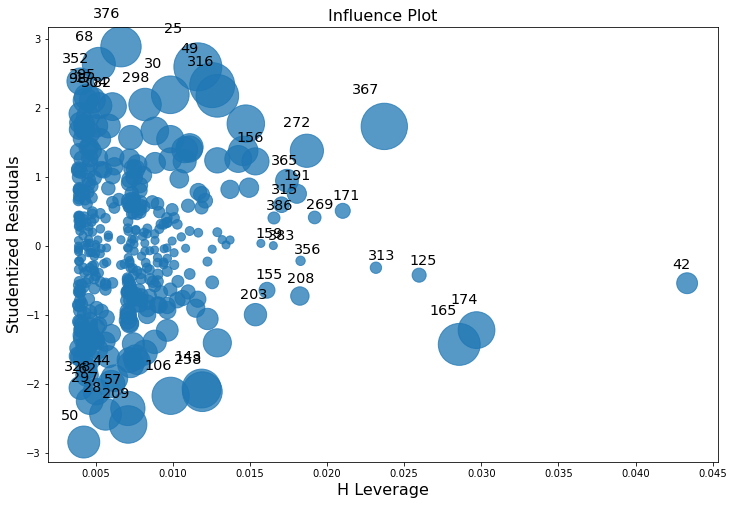

In [232]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(fii2, ax=ax, criterion="cooks")

In [233]:
#there are some high leverage poitns, 367, 165/174;  a few others

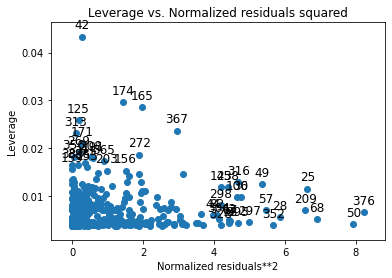

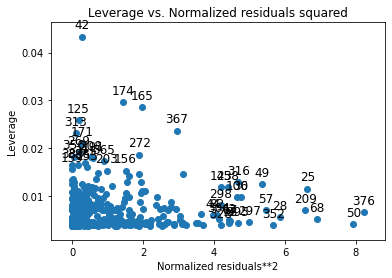

In [234]:
#outliers
sm.graphics.plot_leverage_resid2(fii2)